In [2]:
import sklearn.datasets
import os 
import io
import numpy as np    
import keras
from sklearn.datasets import load_files
from PIL import Image
import keras as k
from keras.utils import np_utils
import tensorflow as tf
from keras.preprocessing.image import array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.python.keras import backend as K
K.clear_session()



In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [7]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [8]:
print (os.path.abspath('.'))

C:\Users\Zhenkun\Desktop\GU\590\final_project


In [9]:
# load data
def load_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels

In [13]:
train = 'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train'
test = 'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/test'
validation = 'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/validation'

x_train, y_train, target_labels = load_data(train)
x_val,y_val,val_labels  = load_data(validation) 
x_test, y_test,_ = load_data(test)

In [14]:
print('The testing set size is : ', x_test.shape[0])
print('The validation set size is : ' , x_val.shape[0])
print('The training set size is : ' , x_train.shape[0])

The testing set size is :  165
The validation set size is :  326
The training set size is :  102


In [15]:
x_train

array(['C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\036.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\133.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\003.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\079.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\132.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\120.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\022.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\096.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_project/data_splite/train\\AFRICAN CROWNED CRANE\\078.jpg',
       'C:/Users/Zhenkun/Desktop/GU/590/final_

In [16]:
s
classnum = len(np.unique(y_train))
y_train = np_utils.to_categorical(y_train,classnum)
#y_val = np_utils.to_categorical(y_val,classnum)
#y_test = np_utils.to_categorical(y_test,classnum)

In [17]:
def image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

In [18]:
x_train = np.array(image_to_array(x_train))
x_val = np.array(image_to_array(x_val))
x_test = np.array(image_to_array(x_test))

In [19]:
x_train = x_train.astype('float32')/127.5
x_val = x_val.astype('float32')/127.5
x_test = x_test.astype('float32')/127.5
x_train[0]

array([[[0.16862746, 0.18039216, 0.09803922],
        [0.15294118, 0.17254902, 0.08627451],
        [0.14509805, 0.16470589, 0.07450981],
        ...,
        [0.654902  , 0.5803922 , 0.5254902 ],
        [0.6627451 , 0.5882353 , 0.53333336],
        [0.6627451 , 0.5882353 , 0.53333336]],

       [[0.16862746, 0.18039216, 0.10588235],
        [0.15686275, 0.16862746, 0.08627451],
        [0.14509805, 0.16470589, 0.07843138],
        ...,
        [0.654902  , 0.5803922 , 0.5254902 ],
        [0.6627451 , 0.5882353 , 0.53333336],
        [0.6666667 , 0.5921569 , 0.5372549 ]],

       [[0.18431373, 0.1882353 , 0.11764706],
        [0.17254902, 0.1764706 , 0.10588235],
        [0.16078432, 0.17254902, 0.09019608],
        ...,
        [0.6313726 , 0.56078434, 0.5058824 ],
        [0.6392157 , 0.5686275 , 0.5137255 ],
        [0.6431373 , 0.57254905, 0.5176471 ]],

       ...,

       [[0.81960785, 0.84313726, 0.7019608 ],
        [0.6745098 , 0.69803923, 0.5568628 ],
        [0.5176471 , 0

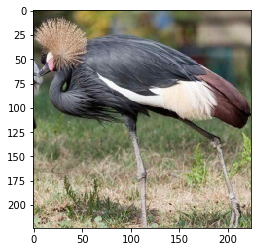

In [26]:
plt.imshow(dataset[0])

In [7]:
from tensorflow.keras.layers import Dense, Conv2DTranspose, LeakyReLU, Reshape, BatchNormalization, Activation, Conv2D
from tensorflow.keras.models import Model, Sequential

def generator():

    model = Sequential()

    model.add(Dense(256*7*7, input_shape = (100,)))
    #model.add(BatchNormalization())
    model.add(LeakyReLU())
    model.add(Reshape((7,7,256)))

    model.add(Conv2DTranspose(256,kernel_size=3, strides=2, padding = "same"))
    #model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))


    model.add(Conv2DTranspose(128,kernel_size=3, strides=2, padding = "same"))
    #model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64,kernel_size=3, strides=2, padding = "same"))
    #model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(64,kernel_size=3, strides=2, padding = "same"))
    #model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2DTranspose(32,kernel_size=3, strides=2, padding = "same"))
    #model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    
    model.add(Conv2D(3,kernel_size=3, padding = "same", activation='tanh'))

    return(model)

module_generator = generator()

module_generator.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12544)             1266944   
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 12544)             0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 14, 14, 256)       590080    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 28, 28, 128)       295040    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 128)      

In [9]:
from tensorflow.keras.layers import Conv2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

def discriminator():

    discriminator = Sequential()
    discriminator.add(Conv2D(32, kernel_size=3, padding = "same", input_shape = (224,224,3)))
    discriminator.add(LeakyReLU(alpha=0.2))
    #discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(64, kernel_size=3,strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    #discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(64, kernel_size=3,strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    #discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(128,kernel_size=3, strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    #discriminator.add(Dropout(0.2))

    discriminator.add(Conv2D(256, kernel_size=3, strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    #discriminator.add(Dropout(0.2))
    
    discriminator.add(Conv2D(256, kernel_size=3, strides=(2,2), padding = "same"))
    discriminator.add(LeakyReLU(alpha=0.2))
    #discriminator.add(Dropout(0.2))
    
    
    discriminator.add(Flatten())
    discriminator.add(Dropout(0.4))
    discriminator.add(Dense(1, activation='sigmoid'))

    opt = Adam(lr=0.0002 ,beta_1=0.5)
    discriminator.compile(loss='binary_crossentropy', optimizer= opt , metrics = ['accuracy'])

    return(discriminator)



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 56, 56, 64)        36928     
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 128)      

In [12]:
def build_gan(generator, discriminator):

    model = Sequential()

    # Combined Generator -> Discriminator model
    model.add(generator)
    model.add(discriminator)

    return model

In [28]:

# Build and compile the Discriminator
discriminator = discriminator()
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator =generator()

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator,discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [25]:
from keras.optimizers import Adam

# Build and compile the Discriminator
discriminator =  keras.models.load_model("Discriminator_1")

discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# Build the Generator
generator =  keras.models.load_model("generator_1")

# Keep Discriminator’s parameters constant for Generator training
discriminator.trainable = False

# Build and compile GAN model with fixed Discriminator to train the Generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

C:\Users\Zhenkun\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [27]:
losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    X_train = x_train

    # Labels for real images: all ones
    real = np.ones((batch_size, 1))

    # Labels for fake images: all zeros
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  Train the Discriminator
        # -------------------------

        # Get a random batch of real images
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Discriminator
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train the Generator
        # ---------------------

        # Generate a batch of fake images
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # Train Generator
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # Save losses and accuracies so they can be plotted after training
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # Output training progress
            print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # Output a sample of generated image
            #sample_images(generator)

In [28]:
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    # Sample random noise
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # Generate images from random noise
    gen_imgs = generator.predict(z)

    # Rescale image pixel values to [0, 1]
    gen_imgs = 0.5 * gen_imgs + 0.5

    # Set image grid
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # Output a grid of images
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1

In [29]:

# Set hyperparameters
z_dim = 100
iterations = 200
batch_size = 64
sample_interval = 10

# Train the GAN for the specified number of iterations
train(iterations, batch_size, sample_interval)

C:\Users\Zhenkun\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Zhenkun\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Zhenkun\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


10 [D loss: 0.999498, acc.: 95.31%] [G loss: 25.064098]
20 [D loss: 0.239883, acc.: 98.44%] [G loss: 30.743694]
30 [D loss: 2.741817, acc.: 61.72%] [G loss: 23.464211]
40 [D loss: 2.053761, acc.: 78.12%] [G loss: 10.243399]
50 [D loss: 0.023836, acc.: 99.22%] [G loss: 12.717163]
60 [D loss: 0.212233, acc.: 97.66%] [G loss: 30.715778]
70 [D loss: 0.023738, acc.: 99.22%] [G loss: 13.920128]
80 [D loss: 0.044784, acc.: 99.22%] [G loss: 11.331252]
90 [D loss: 0.005516, acc.: 100.00%] [G loss: 9.826958]
100 [D loss: 0.249193, acc.: 98.44%] [G loss: 9.059255]
110 [D loss: 0.128427, acc.: 98.44%] [G loss: 37.326542]
120 [D loss: 0.186830, acc.: 98.44%] [G loss: 9.942596]
130 [D loss: 0.010249, acc.: 99.22%] [G loss: 11.070019]
140 [D loss: 0.007955, acc.: 100.00%] [G loss: 9.386137]
150 [D loss: 0.015746, acc.: 99.22%] [G loss: 12.970467]
160 [D loss: 0.115847, acc.: 99.22%] [G loss: 8.673092]
170 [D loss: 0.156572, acc.: 97.66%] [G loss: 12.995411]
180 [D loss: 0.064699, acc.: 99.22%] [G los

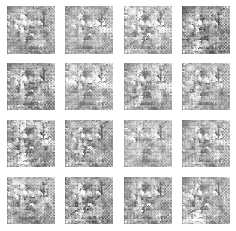

In [32]:
# show images
sample_images(generator)

In [47]:
#save model
generator.save('generator_1')

In [48]:
#save model
discriminator.save('Discriminator_1')

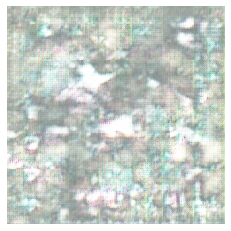

In [39]:
# show colored generated image
def generar_datos_entrada(n):
  X = np.random.randn(100 * n)
  X = X.reshape(n_muestras, 100)
  return X

def crear_datos_fake(modelo_generador, n):
  input = generar_datos_entrada(n)
  X = modelo_generador.predict(input)
  y = np.zeros((n_muestras, 1))
  return X,y


X_fake, _ = crear_datos_fake(n_muestras=1, modelo_generador=generator)
X_fake = (X_fake+1)/2

for i in range(1):
  plt.subplot(1,1,i+1)
  plt.axis('off')
  plt.imshow(X_fake[i])

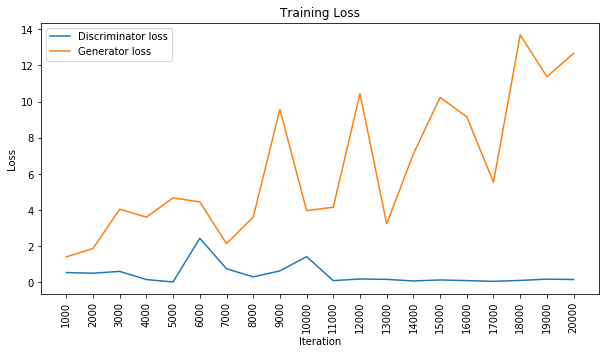

In [46]:
losses = np.array(losses)

# Plot training losses for Discriminator and Generator
plt.figure(figsize=(10, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

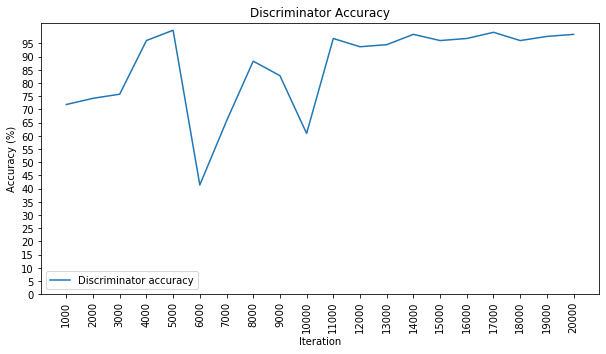

In [45]:
accuracies = np.array(accuracies)

# Plot Discriminator accuracy
plt.figure(figsize=(10, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()

In [39]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [4]:
reconstructed_model = keras.models.load_model("generator_1")


C:\Users\Zhenkun\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [38]:
print(tf.version.VERSION)

2.1.0
